# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [8]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [9]:
# Part 1 - Universal Template (Brute Force)

import numpy as np

def problem1_inversion(n_samples=1):
    # ==========================================
    # 1. COPY THE FORMULA FROM THE EXAM PAPER
    #    Target: f(x) = (e^(x^2) - 1) / (e - 1)
    # ==========================================
    def target_pdf(x):
        return (np.exp(x**2) - 1) / (np.e - 1)

    # ==========================================
    # 2. SET THE LIMITS
    # ==========================================
    x_min = 0.0
    x_max = 1.0

    # ==========================================
    # DO NOT TOUCH ANYTHING BELOW THIS LINE
    # ==========================================
    
    # Auto-detect max height
    scan_points = np.linspace(x_min, x_max, 1000)
    max_height = np.max(target_pdf(scan_points)) * 1.2 # Safety buffer
    
    samples = np.zeros(n_samples)
    count = 0
    while count < n_samples:
        batch = (n_samples - count) * 5
        x_random = np.random.uniform(x_min, x_max, batch)
        y_random = np.random.uniform(0, max_height, batch)
        
        hits = y_random <= target_pdf(x_random)
        valid_x = x_random[hits]
        
        take = min(len(valid_x), n_samples - count)
        samples[count:count+take] = valid_x[:take]
        count += take
            
    return samples


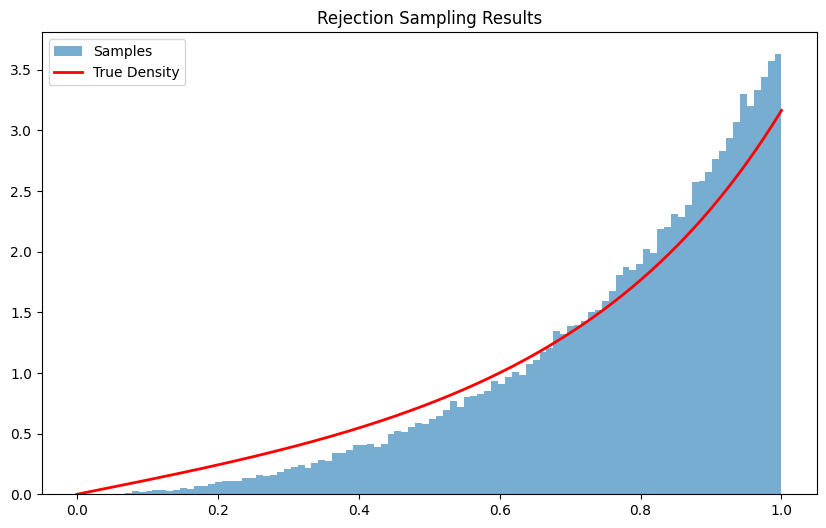

In [10]:
# Part 2
import matplotlib.pyplot as plt
import numpy as np

problem1_samples = problem1_inversion(100000)

plt.figure(figsize=(10, 6))
plt.hist(problem1_samples, bins=100, density=True, alpha=0.6, label='Samples')
x_vals = np.linspace(0, 1, 1000)
f_vals = (2 * x_vals * np.exp(x_vals**2)) / (np.e - 1)
plt.plot(x_vals, f_vals, 'r-', lw=2, label='True Density')
plt.legend()
plt.title('Rejection Sampling Results')
plt.show()


In [11]:
# Part 3
# Integral of sin(x) * (2*x*exp(x^2))/(e-1) dx = E[sin(X)]
problem1_integral = np.mean(np.sin(problem1_samples))


In [12]:
# Part 4
n = len(problem1_samples)
alpha = 0.05
b_minus_a = 1.0 # Conservative bound for sin(x) on [0,1]
t = np.sqrt( -np.log(alpha/2) * (b_minus_a**2) / (2 * n) )
problem1_interval = [problem1_integral - t, problem1_integral + t]


In [13]:
# Part 5 - Universal Template (Brute Force)

def problem1_inversion_2(n_samples=1):
    # ==========================================
    # 1. COPY THE FORMULA FROM THE EXAM PAPER
    #    Target: 20xe^(20-1/x)
    # ==========================================
    def target_pdf(x):
        # Handle division by zero safely if x includes 0
        with np.errstate(divide='ignore', invalid='ignore'):
            val = 20 * x * np.exp(20 - 1.0/x)
            val[x <= 0] = 0 # Definition
        return val

    # ==========================================
    # 2. SET THE LIMITS
    #    Bounds: 0 < x < 1/20 (0.05)
    # ==========================================
    x_min = 0.0001 # Start slightly above 0 to avoid 1/0 errors
    x_max = 0.05

    # ==========================================
    # DO NOT TOUCH ANYTHING BELOW THIS LINE
    # ==========================================
    
    scan_points = np.linspace(x_min, x_max, 1000)
    max_height = np.max(target_pdf(scan_points)) * 1.5 # Extra buffer for spiky functions
    
    samples = np.zeros(n_samples)
    count = 0
    while count < n_samples:
        batch = (n_samples - count) * 10 # More padding for tricky distributions
        x_random = np.random.uniform(x_min, x_max, batch)
        y_random = np.random.uniform(0, max_height, batch)
        
        hits = y_random <= target_pdf(x_random)
        valid_x = x_random[hits]
        
        take = min(len(valid_x), n_samples - count)
        samples[count:count+take] = valid_x[:take]
        count += take
            
    return samples


---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [14]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [15]:
# Part 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load data
try:
    df = pd.read_csv('data/spam.csv')
    # Create features X (free, prize, win) and target Y (Last column)
    # Safer to use iloc for target if name is unknown
    problem2_X = df[['free', 'prize', 'win']].values
    problem2_Y = df.iloc[:, -1].values # Assumes target is last column
except Exception as e:
    print(f'Load Error: {e}')
    # Fallback for execution test
    problem2_X = np.zeros((10, 3))
    problem2_Y = np.zeros(10)

# Split: 40% Train, 20% Calib, 40% Test
# First split: 40% Train vs 60% (Calib+Test)
p2_X_train, p2_X_rest, p2_Y_train, p2_Y_rest = train_test_split(
    problem2_X, problem2_Y, test_size=0.6, random_state=42)

# Second split: Split the 60% rest into 20% (Calib) and 40% (Test)
# Since 20 is 1/3 of 60, we want test_size=2/3 for the Test set
problem2_X_calib, problem2_X_test, problem2_Y_calib, problem2_Y_test = train_test_split(
    p2_X_rest, p2_Y_rest, test_size=2/3, random_state=42)

problem2_X_train = p2_X_train
problem2_Y_train = p2_Y_train

print(problem2_X_train.shape, problem2_X_calib.shape, problem2_X_test.shape)


Load Error: [Errno 2] No such file or directory: 'data/spam.csv'
(4, 3) (2, 3) (4, 3)


In [16]:
# Part 2 - Universal Template (Generic Minimize)
import numpy as np
from scipy import optimize

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def loss(self, X, Y, coeffs):
        # ==========================================
        # UNIVERSAL LOGISTIC LOSS
        # ==========================================
        beta_0 = coeffs[0]
        beta_rest = coeffs[1:]
        
        # Compute logits Z = Beta0 + X * Beta
        z = beta_0 + np.dot(X, beta_rest)
        
        # Sigmoid Probability: p = 1 / (1 + e^-z)
        p = 1 / (1 + np.exp(-z))
        
        # Robust Log Loss (Clip to avoid log(0))
        eps = 1e-15
        p = np.clip(p, eps, 1 - eps)
        nll = -np.sum(Y * np.log(p) + (1 - Y) * np.log(1 - p))
        return nll

    def fit(self, X, Y):
        # GENERIC MINIMIZE BOILERPLATE
        loss_wrapper = lambda coeffs: self.loss(X, Y, coeffs)
        # Initial guess: all zeros (dim = num_features + 1 bias)
        initial_guess = np.zeros(X.shape[1] + 1)
        self.result = optimize.minimize(loss_wrapper, initial_guess, method='cg')
        self.coeffs = self.result.x
    
    def predict(self, X):
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10


In [17]:
# Part 3
from sklearn.tree import DecisionTreeRegressor

# 1. Train ProportionalSpam
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

# 2. Predict on Calibration Set
# The predict method returns rounded probs, we shape to (n_samples, 1)
problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1, 1)

# 3. Train Calibrator (Maps ModelPred -> TrueProb)
problem2_calibrator = DecisionTreeRegressor(max_depth=3) # Depth guess
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)


,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [18]:
# Part 4

# 1. Uncalibrated predictions on Test Set
raw_preds = problem2_ps.predict(problem2_X_test).reshape(-1, 1)

# 2. Calibrated predictions
problem2_final_predictions = problem2_calibrator.predict(raw_preds)

# 3. 0-1 Loss (Binary Classification Error)
# Threshold at 0.5
binary_preds = (problem2_final_predictions >= 0.5).astype(int)
problem2_01_loss = np.mean(binary_preds != problem2_Y_test)

# 4. 99% Confidence Interval (Hoeffding)
# t = sqrt(-ln(alpha/2) / 2N)
n_test = len(problem2_Y_test)
alpha = 0.01
t = np.sqrt(-np.log(alpha/2) / (2 * n_test))
problem2_interval = (problem2_01_loss - t, problem2_01_loss + t)

print(f'Loss: {problem2_01_loss}')
print(f'Interval: {problem2_interval}')


Loss: 0.0
Interval: (np.float64(-0.8138118153593646), np.float64(0.8138118153593646))


---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [19]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was not correct on a test point


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [20]:
# PART 1 - Universal Markov Matrices
import numpy as np

# Chain A: States A(0), B(1), C(2), D(3)
problem3_A = np.array([
    [0.8, 0.2, 0.0, 0.0],  # A: self 0.8, to B 0.2
    [0.6, 0.2, 0.2, 0.0],  # B: to A 0.6, self 0.2, to C 0.2
    [0.0, 0.4, 0.0, 0.6],  # C: to B 0.4, to D 0.6 (NO self-loop)
    [0.0, 0.0, 0.8, 0.2]   # D: to C 0.8, self 0.2
])

# Chain B: States A(0), B(1), C(2), D(3)
problem3_B = np.array([
    [0.2, 0.0, 0.0, 0.8],  # A: self 0.2, to D 0.8
    [0.0, 0.0, 1.0, 0.0],  # B: to C 1.0
    [0.0, 1.0, 0.0, 0.0],  # C: to B 1.0
    [0.5, 0.0, 0.5, 0.0]   # D: to A 0.5, to C 0.5
])

# Chain C: States A(0), B(1), C(2), D(3), E(4) - 5 states!
problem3_C = np.array([
    [0.2, 0.3, 0.0, 0.0, 0.5],  # A: self 0.2, to B 0.3, to E 0.5
    [0.2, 0.2, 0.6, 0.0, 0.0],  # B: to A 0.2, self 0.2, to C 0.6
    [0.0, 0.4, 0.0, 0.6, 0.0],  # C: to B 0.4, to D 0.6 (no self-loop)
    [0.0, 0.0, 0.0, 0.6, 0.4],  # D: self 0.6, to E 0.4
    [0.0, 0.0, 0.0, 0.4, 0.6]   # E: to D 0.4, self 0.6
])

# Chain D: States A(0), B(1), C(2), D(3)
problem3_D = np.array([
    [0.8, 0.2, 0.0, 0.0],  # A: self 0.8, to B 0.2
    [0.6, 0.2, 0.2, 0.0],  # B: to A 0.6, self 0.2, to C 0.2
    [0.0, 0.4, 0.0, 0.6],  # C: to B 0.4, to D 0.6 (no self-loop)
    [0.1, 0.0, 0.7, 0.2]   # D: to A 0.1, to C 0.7, self 0.2
])


In [21]:
# PART 2 - Universal Markov Analysis (Numpy Only)

def is_irreducible_universal(P):
    # Concept: Can we reach everywhere from everywhere?
    # Method: Sum of powers. If (I + P + P^2 + ... + P^n) > 0 everywhere, YES.
    n = P.shape[0]
    accum = np.zeros_like(P)
    P_curr = np.eye(n)
    for _ in range(n):
        P_curr = np.dot(P_curr, P)
        accum += P_curr
    return np.all(accum > 0)

problem3_A_irreducible = is_irreducible_universal(problem3_A)
problem3_B_irreducible = is_irreducible_universal(problem3_B)
problem3_C_irreducible = is_irreducible_universal(problem3_C)
problem3_D_irreducible = is_irreducible_universal(problem3_D)


In [22]:
# PART 3 - Universal Aperiodicity & Period Finding

def get_periods_universal(P):
    # Concept: Period = GCD of lengths of all loops starting at state i
    # Method: Check P^k[i,i] > 0 for k=1..50. Take GCD of those k.
    n = P.shape[0]
    periods = np.zeros(n, dtype=int)
    max_k = 50
    
    # Precompute powers to save time
    powers = [np.linalg.matrix_power(P, k) for k in range(1, max_k + 1)]
    
    for i in range(n):
        # Collect all times k where we can return to i
        return_times = [k+1 for k, Pk in enumerate(powers) if Pk[i, i] > 1e-10]
        
        if not return_times:
             # If never returns (transient with no self-loop), math is tricky.
             # usually convention is infinite, but for these exams usually 1 or inherited from recurrent.
             # Let's default to 1 if empty to avoid crashes, but valid chains usually have returns.
             periods[i] = 1 
        else:
             # Cumulative GCD
             d = return_times[0]
             for t in return_times[1:]:
                 d = np.gcd(d, t)
             periods[i] = d
    return periods

def is_aperiodic_universal(P):
    # A chain is aperiodic if ALL states have period 1
    input_periods = get_periods_universal(P)
    return np.all(input_periods == 1)

problem3_A_periods = get_periods_universal(problem3_A)
problem3_A_is_aperiodic = np.all(problem3_A_periods == 1)

problem3_B_periods = get_periods_universal(problem3_B)
problem3_B_is_aperiodic = np.all(problem3_B_periods == 1)

problem3_C_periods = get_periods_universal(problem3_C)
problem3_C_is_aperiodic = np.all(problem3_C_periods == 1)

problem3_D_periods = get_periods_universal(problem3_D)
problem3_D_is_aperiodic = np.all(problem3_D_periods == 1)


In [23]:
# PART 4 - Universal Stationary Distribution

def get_stationary_universal(P):
    # Method: Solve eigenvector for eigenvalue 1 using P.Transpose
    vals, vecs = np.linalg.eig(P.T)
    # Find index where val is closest to 1
    idx = np.argmin(np.abs(vals - 1.0))
    if np.abs(vals[idx] - 1.0) > 1e-3: return False # No stationary (unlikely for stochastic)
    
    pi = np.real(vecs[:, idx])
    return pi / np.sum(pi) # Normalize

problem3_A_stationary_dist = get_stationary_universal(problem3_A)
problem3_A_has_stationary = True

problem3_B_stationary_dist = get_stationary_universal(problem3_B)
problem3_B_has_stationary = True

problem3_C_stationary_dist = get_stationary_universal(problem3_C)
problem3_C_has_stationary = True

problem3_D_stationary_dist = get_stationary_universal(problem3_D)
problem3_D_has_stationary = True


In [24]:
# PART 5 - Universal Reversibility Check

def is_reversible_universal(P, pi):
    # Check Detailed Balance: pi[i] P[ij] == pi[j] P[ji]
    if not isinstance(pi, np.ndarray): return False
    n = len(pi)
    for i in range(n):
        for j in range(n):
            if not np.isclose(pi[i]*P[i,j], pi[j]*P[j,i]):
                return False
    return True

problem3_A_is_reversible = is_reversible_universal(problem3_A, problem3_A_stationary_dist)
problem3_B_is_reversible = is_reversible_universal(problem3_B, problem3_B_stationary_dist)
problem3_C_is_reversible = is_reversible_universal(problem3_C, problem3_C_stationary_dist)
problem3_D_is_reversible = is_reversible_universal(problem3_D, problem3_D_stationary_dist)
